# 12b - Study - AgriPV Systems

This journal is based on the AgriPV Journal, looping through various clearance-heights of the modules. 

<a id='step1'></a>

In [1]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'bifacial_radiance' / 'TEMP' / 'AgriPVStudy')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\bifacial_radiance\TEMP')  

try:
    os.stat(testfolder)
except:
    os.mkdir(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\Silvana\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\AgriPVStudy


In [7]:
from bifacial_radiance import *   
import numpy as np
import datetime

In [8]:
startdt_tomato =datetime.datetime(2001,3,15,0)
enddt_tomato = datetime.datetime(2001,6,30,23)
startdt_kale = datetime.datetime(2001,9,15,0)
enddt_kale = datetime.datetime(2001,10,31,23)
startdt_PV = datetime.datetime(2001,1,1,0)
enddt_PV = datetime.datetime(2001,12,31,23)

In [9]:
hub_heights = [4.3, 3.5, 2.5, 1.5]
albedo = 0.2  #'grass'     # ground albedo
crops = ['tomato', 'kale']

# Redundant. Overwritihng the Radiance Obj for each loop below to have a unique name.
demo = RadianceObj('getEPW_notused',path = testfolder)  # Create a RadianceObj 'object'
demo.setGround(albedo) # input albedo number or material name like 'concrete'.  To see options, run this without any input.
lat = 32.22  # Tucson, AZ
lon = -110.97  # Tucson, Az 32.2226° N, 110.9747° W
epwfile = demo.getEPW(lat, lon) # NJ lat/lon 40.0583° N, 74.4057

path = C:\Users\Silvana\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\AgriPVStudy
Loading albedo, 1 value(s), 0.200 avg
1 nonzero albedo values.
Getting weather file: USA_AZ_Tucson.Intl.AP.722740_TMY3.epw
 ... OK!


In [11]:
for jj in range (0, len(hub_heights)):
    hub_height = hub_heights[jj]
    simulationname = 'height_'+ str(int(hub_height*100))+'cm'

    #Location:
    # MakeModule Parameters
    moduletype='PrismSolar'
    numpanels = 3  # AgriPV site has 3 modules along the y direction (N-S since we are facing it to the south) .
    x = 0.95  
    y = 1.95
    xgap = 2.0# Leaving 15 centimeters between modules on x direction
    ygap = 0.10 # Leaving 10 centimeters between modules on y direction
    zgap = 0 # no gap to torquetube.
    sensorsy = 6*numpanels  # this will give 6 sensors per module, 1 per cell

    # Other default values:

    # TorqueTube Parameters
    axisofrotationTorqueTube=False
    torqueTube = False
    cellLevelModule = True

    numcellsx = 12
    numcellsy = 6
    xcell = 0.156
    ycell = 0.156
    xcellgap = 0.02
    ycellgap = 0.02

    cellLevelModuleParams = {'numcellsx': numcellsx, 'numcellsy':numcellsy, 
                             'xcell': xcell, 'ycell': ycell, 'xcellgap': xcellgap, 'ycellgap': ycellgap}

    # SceneDict Parameters
    pitch = 15 # m
    torquetube_height = hub_height - 0.1 # m
    nMods = 6 # six modules per row.
    nRows = 3  # 3 row

    azimuth_ang=180 # Facing south
    tilt =35 # tilt. 

    # Now let's run the example
    demo = RadianceObj(simulationname,path = testfolder)  # Create a RadianceObj 'object'
    demo.setGround(albedo) # input albedo number or material name like 'concrete'.  To see options, run this without any input.

    #demo.gendaylit(4020)  # Use this to simulate only one hour at a time. 
    # Making module with all the variables
    moduleDict=demo.makeModule(name=moduletype,x=x,y=y,numpanels = numpanels, xgap=xgap, ygap=ygap, cellLevelModuleParams = cellLevelModuleParams)
    # create a scene with all the variables
    sceneDict = {'tilt':tilt,'pitch': 15,'hub_height':hub_height,'azimuth':azimuth_ang, 'module_type':moduletype, 'nMods': nMods, 'nRows': nRows}  
    scene = demo.makeScene(moduletype=moduletype, sceneDict=sceneDict) #makeScene creates a .rad file with 20 modules per row, 7 rows.
    octfile = demo.makeOct(demo.getfilelist())  # makeOct combines all of the ground, sky and object fil|es into a .oct file.

    torquetubelength = moduleDict['scenex']*(nMods) 

    # torquetube 1
    name='Post1'
    text='! genbox Metal_Aluminum_Anodized torquetube_row1 {} 0.2 0.3 | xform -t {} -0.1 -0.3 | xform -t 0 0 {}'.format(torquetubelength, (-torquetubelength+moduleDict['sceney'])/2.0, torquetube_height)
    customObject = demo.makeCustomObject(name,text)
    demo.appendtoScene(radfile=scene.radfiles, customObject=customObject, text="!xform -rz 0")

    name='Post2'
    text='! genbox Metal_Aluminum_Anodized torquetube_row2 {} 0.2 0.3 | xform -t {} -0.1 -0.3 | xform -t 0 15 {}'.format(torquetubelength, (-torquetubelength+moduleDict['sceney'])/2.0, torquetube_height)
    customObject = demo.makeCustomObject(name,text)
    demo.appendtoScene(radfile=scene.radfiles, customObject=customObject, text="!xform -rz 0")

    name='Post3'
    text='! genbox Metal_Aluminum_Anodized torquetube_row2 {} 0.2 0.3 | xform -t {} -0.1 -0.3 | xform -t 0 -15 {}'.format(torquetubelength, (-torquetubelength+moduleDict['sceney'])/2.0, torquetube_height)
    customObject = demo.makeCustomObject(name,text)
    demo.appendtoScene(radfile=scene.radfiles, customObject=customObject, text="!xform -rz 0")

    name='Pile'
    pile1x = (torquetubelength+moduleDict['sceney'])/2.0
    pilesep = pile1x*2.0/7.0
    #! genrev Metal_Grey tube1 t*1.004 0.05 32 | xform -ry 90 -t -0.502 0 0
    text= '! genrev Metal_Grey tube1row1 t*{} 0.15 32 | xform -t {} 0 0'.format(torquetube_height, pile1x)
    text += '\r\n! genrev Metal_Grey tube1row2 t*{} 0.15 32 | xform -t {} 15 0'.format(torquetube_height, pile1x)
    text += '\r\n! genrev Metal_Grey tube1row3 t*{} 0.15 32 | xform -t {} -15 0'.format(torquetube_height, pile1x)

    for i in range (1, 7):
        text += '\r\n! genrev Metal_Grey tube{}row1 t*{} 0.15 32 | xform -t {} 0 0'.format(i+1, torquetube_height, pile1x-pilesep*i)
        text += '\r\n! genrev Metal_Grey tube{}row2 t*{} 0.15 32 | xform -t {} 15 0'.format(i+1, torquetube_height, pile1x-pilesep*i)
        text += '\r\n! genrev Metal_Grey tube{}row3 t*{} 0.15 32 | xform -t {} -15 0'.format(i+1, torquetube_height, pile1x-pilesep*i)

    customObject = demo.makeCustomObject(name,text)
    demo.appendtoScene(radfile=scene.radfiles, customObject=customObject, text="!xform -rz 0")


    for zz in range (0, len(crops)):
        crop = crops[zz]
        if crop == 'tomato':
            #startdt =datetime.datetime(2001,3,15,0)
            #enddt = datetime.datetime(2001,6,30,23)
            starttime = '03_15_01' 
            endtime = '06_30_23'
            print('PLANTING TOMATO')

        if crop == 'kale':
#            startdt = datetime.datetime(2001,9,15,0)
#            enddt = datetime.datetime(2001,10,31,23)
            starttime = '09_15_01' 
            endtime = '10_31_23'
            print('PLANTING KALE')
        
        metdata = demo.readEPW(epwfile, starttime = starttime, endtime = endtime) # read in the EPW weather data from above
        demo.genCumSky(savefile = crop)#startdt=startdt, enddt=enddt)

        octfile = demo.makeOct()  # makeOct combines all of the ground, sky and object files into a .oct file.

        analysis = AnalysisObj(octfile, demo.name)  # return an analysis object including the scan dimensions for back irradiance
        sensorsy = 30
        sensorsx = 30
        startgroundsample=-moduleDict['scenex']
        spacingbetweensamples = moduleDict['scenex']/(sensorsx-1)

        for i in range (0, sensorsx):  
            frontscan, backscan = analysis.moduleAnalysis(scene, sensorsy=sensorsy)
            groundscan = frontscan
            groundscan['zstart'] = 0.05  # setting it 5 cm from the ground.
            groundscan['zinc'] = 0   # no tilt necessary. 
            groundscan['yinc'] = pitch/(sensorsy-1)   # increasing spacing so it covers all distance between rows
            groundscan['xstart'] = startgroundsample + i*spacingbetweensamples   # increasing spacing so it covers all distance between rows
            analysis.analysis(octfile, simulationname+'_'+crop+'_'+str(i), groundscan, backscan)  # compare the back vs front irradiance  

    metdata = demo.readEPW(epwfile) # read in the EPW weather data from above
    demo.genCumSky(savefile = 'PV')#startdt=startdt, enddt=enddt)

    octfile = demo.makeOct()  # makeOct combines all of the ground, sky and object files into a .oct file.

    analysis = AnalysisObj(octfile, demo.name)  # return an analysis object including the scan dimensions for back irradiance
    sensorsy = 20
    sensorsx = 12
    startPVsample=-moduleDict['x']
    spacingbetweenPVsamples = moduleDict['x']/(sensorsx-1)

    for i in range (0, sensorsx): # Will map 20 points    
        frontscan, backscan = analysis.moduleAnalysis(scene, sensorsy=sensorsy)
        frontscan['xstart'] = startPVsample + i*spacingbetweenPVsamples   # increasing spacing so it covers all distance between rows
        analysis.analysis(octfile, simulationname+'_PV_'+str(i), frontscan, backscan)  # compare the back vs front irradiance  




path = C:\Users\Silvana\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\AgriPVStudy
Loading albedo, 1 value(s), 0.200 avg
1 nonzero albedo values.

Module Name: PrismSolar
Pre-existing .rad file objects\PrismSolar.rad will be overwritten
Module was shifted by 0.078 in X to avoid sensors on air
This is a Cell-Level detailed module with Packaging Factor of 0.81 %
Module PrismSolar updated in module.json
Created height_430cm.oct

Custom Object Name objects\Post1.rad

Custom Object Name objects\Post2.rad

Custom Object Name objects\Post3.rad

Custom Object Name objects\Pile.rad
PLANTING TOMATO
Saving file EPWs\epw_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos
message: Error!  Solar altitude is -11 < -6 degrees and Idh = 12 > 10 W/m^2 on day 74 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -10 < -6 degrees and Idh = 25 > 10 W/m^2 on day 74 !Ibn is 0.  Attempting to continue!
Er

Saved: results\irr_height_430cm_tomato_23.csv
Linescan in process: height_430cm_tomato_24_Front
Linescan in process: height_430cm_tomato_24_Back
Saved: results\irr_height_430cm_tomato_24.csv
Linescan in process: height_430cm_tomato_25_Front
Linescan in process: height_430cm_tomato_25_Back
Saved: results\irr_height_430cm_tomato_25.csv
Linescan in process: height_430cm_tomato_26_Front
Linescan in process: height_430cm_tomato_26_Back
Saved: results\irr_height_430cm_tomato_26.csv
Linescan in process: height_430cm_tomato_27_Front
Linescan in process: height_430cm_tomato_27_Back
Saved: results\irr_height_430cm_tomato_27.csv
Linescan in process: height_430cm_tomato_28_Front
Linescan in process: height_430cm_tomato_28_Back
Saved: results\irr_height_430cm_tomato_28.csv
Linescan in process: height_430cm_tomato_29_Front
Linescan in process: height_430cm_tomato_29_Back
Saved: results\irr_height_430cm_tomato_29.csv
PLANTING KALE
Saving file EPWs\epw_temp.csv, # points: 8760
Calculating Sun position

Created height_430cm.oct
Linescan in process: height_430cm_PV_0_Front
Linescan in process: height_430cm_PV_0_Back
Saved: results\irr_height_430cm_PV_0.csv
Linescan in process: height_430cm_PV_1_Front
Linescan in process: height_430cm_PV_1_Back
Saved: results\irr_height_430cm_PV_1.csv
Linescan in process: height_430cm_PV_2_Front
Linescan in process: height_430cm_PV_2_Back
Saved: results\irr_height_430cm_PV_2.csv
Linescan in process: height_430cm_PV_3_Front
Linescan in process: height_430cm_PV_3_Back
Saved: results\irr_height_430cm_PV_3.csv
Linescan in process: height_430cm_PV_4_Front
Linescan in process: height_430cm_PV_4_Back
Saved: results\irr_height_430cm_PV_4.csv
Linescan in process: height_430cm_PV_5_Front
Linescan in process: height_430cm_PV_5_Back
Saved: results\irr_height_430cm_PV_5.csv
Linescan in process: height_430cm_PV_6_Front
Linescan in process: height_430cm_PV_6_Back
Saved: results\irr_height_430cm_PV_6.csv
Linescan in process: height_430cm_PV_7_Front
Linescan in process:

Saved: results\irr_height_350cm_tomato_12.csv
Linescan in process: height_350cm_tomato_13_Front
Linescan in process: height_350cm_tomato_13_Back
Saved: results\irr_height_350cm_tomato_13.csv
Linescan in process: height_350cm_tomato_14_Front
Linescan in process: height_350cm_tomato_14_Back
Saved: results\irr_height_350cm_tomato_14.csv
Linescan in process: height_350cm_tomato_15_Front
Linescan in process: height_350cm_tomato_15_Back
Saved: results\irr_height_350cm_tomato_15.csv
Linescan in process: height_350cm_tomato_16_Front
Linescan in process: height_350cm_tomato_16_Back
Saved: results\irr_height_350cm_tomato_16.csv
Linescan in process: height_350cm_tomato_17_Front
Linescan in process: height_350cm_tomato_17_Back
Saved: results\irr_height_350cm_tomato_17.csv
Linescan in process: height_350cm_tomato_18_Front
Linescan in process: height_350cm_tomato_18_Back
Saved: results\irr_height_350cm_tomato_18.csv
Linescan in process: height_350cm_tomato_19_Front
Linescan in process: height_350cm_

Saved: results\irr_height_350cm_kale_27.csv
Linescan in process: height_350cm_kale_28_Front
Linescan in process: height_350cm_kale_28_Back
Saved: results\irr_height_350cm_kale_28.csv
Linescan in process: height_350cm_kale_29_Front
Linescan in process: height_350cm_kale_29_Back
Saved: results\irr_height_350cm_kale_29.csv
Saving file EPWs\epw_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos
message: Error!  Solar altitude is -8 < -6 degrees and Idh = 11 > 10 W/m^2 on day 16 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -8 < -6 degrees and Idh = 12 > 10 W/m^2 on day 16 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -8 < -6 degrees and Idh = 14 > 10 W/m^2 on day 18 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -7 < -6 degrees and Idh = 17 > 10 W/m^2 on day 19 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -7 < -6 degrees and Idh = 19 > 10 W/m^2

Created height_350cm.oct
Linescan in process: height_350cm_PV_0_Front
Linescan in process: height_350cm_PV_0_Back
Saved: results\irr_height_350cm_PV_0.csv
Linescan in process: height_350cm_PV_1_Front
Linescan in process: height_350cm_PV_1_Back
Saved: results\irr_height_350cm_PV_1.csv
Linescan in process: height_350cm_PV_2_Front
Linescan in process: height_350cm_PV_2_Back
Saved: results\irr_height_350cm_PV_2.csv
Linescan in process: height_350cm_PV_3_Front
Linescan in process: height_350cm_PV_3_Back
Saved: results\irr_height_350cm_PV_3.csv
Linescan in process: height_350cm_PV_4_Front
Linescan in process: height_350cm_PV_4_Back
Saved: results\irr_height_350cm_PV_4.csv
Linescan in process: height_350cm_PV_5_Front
Linescan in process: height_350cm_PV_5_Back
Saved: results\irr_height_350cm_PV_5.csv
Linescan in process: height_350cm_PV_6_Front
Linescan in process: height_350cm_PV_6_Back
Saved: results\irr_height_350cm_PV_6.csv
Linescan in process: height_350cm_PV_7_Front
Linescan in process:

Saved: results\irr_height_250cm_tomato_12.csv
Linescan in process: height_250cm_tomato_13_Front
Linescan in process: height_250cm_tomato_13_Back
Saved: results\irr_height_250cm_tomato_13.csv
Linescan in process: height_250cm_tomato_14_Front
Linescan in process: height_250cm_tomato_14_Back
Saved: results\irr_height_250cm_tomato_14.csv
Linescan in process: height_250cm_tomato_15_Front
Linescan in process: height_250cm_tomato_15_Back
Saved: results\irr_height_250cm_tomato_15.csv
Linescan in process: height_250cm_tomato_16_Front
Linescan in process: height_250cm_tomato_16_Back
Saved: results\irr_height_250cm_tomato_16.csv
Linescan in process: height_250cm_tomato_17_Front
Linescan in process: height_250cm_tomato_17_Back
Saved: results\irr_height_250cm_tomato_17.csv
Linescan in process: height_250cm_tomato_18_Front
Linescan in process: height_250cm_tomato_18_Back
Saved: results\irr_height_250cm_tomato_18.csv
Linescan in process: height_250cm_tomato_19_Front
Linescan in process: height_250cm_

Saved: results\irr_height_250cm_kale_27.csv
Linescan in process: height_250cm_kale_28_Front
Linescan in process: height_250cm_kale_28_Back
Saved: results\irr_height_250cm_kale_28.csv
Linescan in process: height_250cm_kale_29_Front
Linescan in process: height_250cm_kale_29_Back
Saved: results\irr_height_250cm_kale_29.csv
Saving file EPWs\epw_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos
message: Error!  Solar altitude is -8 < -6 degrees and Idh = 11 > 10 W/m^2 on day 16 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -8 < -6 degrees and Idh = 12 > 10 W/m^2 on day 16 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -8 < -6 degrees and Idh = 14 > 10 W/m^2 on day 18 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -7 < -6 degrees and Idh = 17 > 10 W/m^2 on day 19 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -7 < -6 degrees and Idh = 19 > 10 W/m^2

Created height_250cm.oct
Linescan in process: height_250cm_PV_0_Front
Linescan in process: height_250cm_PV_0_Back
Saved: results\irr_height_250cm_PV_0.csv
Linescan in process: height_250cm_PV_1_Front
Linescan in process: height_250cm_PV_1_Back
Saved: results\irr_height_250cm_PV_1.csv
Linescan in process: height_250cm_PV_2_Front
Linescan in process: height_250cm_PV_2_Back
Saved: results\irr_height_250cm_PV_2.csv
Linescan in process: height_250cm_PV_3_Front
Linescan in process: height_250cm_PV_3_Back
Saved: results\irr_height_250cm_PV_3.csv
Linescan in process: height_250cm_PV_4_Front
Linescan in process: height_250cm_PV_4_Back
Saved: results\irr_height_250cm_PV_4.csv
Linescan in process: height_250cm_PV_5_Front
Linescan in process: height_250cm_PV_5_Back
Saved: results\irr_height_250cm_PV_5.csv
Linescan in process: height_250cm_PV_6_Front
Linescan in process: height_250cm_PV_6_Back
Saved: results\irr_height_250cm_PV_6.csv
Linescan in process: height_250cm_PV_7_Front
Linescan in process:

Saved: results\irr_height_150cm_tomato_12.csv
Linescan in process: height_150cm_tomato_13_Front
Linescan in process: height_150cm_tomato_13_Back
Saved: results\irr_height_150cm_tomato_13.csv
Linescan in process: height_150cm_tomato_14_Front
Linescan in process: height_150cm_tomato_14_Back
Saved: results\irr_height_150cm_tomato_14.csv
Linescan in process: height_150cm_tomato_15_Front
Linescan in process: height_150cm_tomato_15_Back
Saved: results\irr_height_150cm_tomato_15.csv
Linescan in process: height_150cm_tomato_16_Front
Linescan in process: height_150cm_tomato_16_Back
Saved: results\irr_height_150cm_tomato_16.csv
Linescan in process: height_150cm_tomato_17_Front
Linescan in process: height_150cm_tomato_17_Back
Saved: results\irr_height_150cm_tomato_17.csv
Linescan in process: height_150cm_tomato_18_Front
Linescan in process: height_150cm_tomato_18_Back
Saved: results\irr_height_150cm_tomato_18.csv
Linescan in process: height_150cm_tomato_19_Front
Linescan in process: height_150cm_

Saved: results\irr_height_150cm_kale_27.csv
Linescan in process: height_150cm_kale_28_Front
Linescan in process: height_150cm_kale_28_Back
Saved: results\irr_height_150cm_kale_28.csv
Linescan in process: height_150cm_kale_29_Front
Linescan in process: height_150cm_kale_29_Back
Saved: results\irr_height_150cm_kale_29.csv
Saving file EPWs\epw_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos
message: Error!  Solar altitude is -8 < -6 degrees and Idh = 11 > 10 W/m^2 on day 16 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -8 < -6 degrees and Idh = 12 > 10 W/m^2 on day 16 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -8 < -6 degrees and Idh = 14 > 10 W/m^2 on day 18 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -7 < -6 degrees and Idh = 17 > 10 W/m^2 on day 19 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -7 < -6 degrees and Idh = 19 > 10 W/m^2

Created height_150cm.oct
Linescan in process: height_150cm_PV_0_Front
Linescan in process: height_150cm_PV_0_Back
Saved: results\irr_height_150cm_PV_0.csv
Linescan in process: height_150cm_PV_1_Front
Linescan in process: height_150cm_PV_1_Back
Saved: results\irr_height_150cm_PV_1.csv
Linescan in process: height_150cm_PV_2_Front
Linescan in process: height_150cm_PV_2_Back
Saved: results\irr_height_150cm_PV_2.csv
Linescan in process: height_150cm_PV_3_Front
Linescan in process: height_150cm_PV_3_Back
Saved: results\irr_height_150cm_PV_3.csv
Linescan in process: height_150cm_PV_4_Front
Linescan in process: height_150cm_PV_4_Back
Saved: results\irr_height_150cm_PV_4.csv
Linescan in process: height_150cm_PV_5_Front
Linescan in process: height_150cm_PV_5_Back
Saved: results\irr_height_150cm_PV_5.csv
Linescan in process: height_150cm_PV_6_Front
Linescan in process: height_150cm_PV_6_Back
Saved: results\irr_height_150cm_PV_6.csv
Linescan in process: height_150cm_PV_7_Front
Linescan in process:

In [ ]:
cleanResult

## PLOT RESULTS

In [58]:
import pandas as pd
import seaborn as sns

In [44]:
import matplotlib.pyplot as plt
import matplotlib

In [45]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

In [39]:
hub_heights = [4.3, 3.5, 2.5, 1.5]
results_BGG=[]
for i in range(0, len(hub_heights)):
    hub_height = str(int(hub_heights[i]*100))
    filepv= r'C:\Users\Silvana\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\AgriPVStudy\results\irr_height_{}cm_PV_6.csv'.format(hub_height)
    resultsDF = load.read1Result(filepv)
    resultsDF = load.cleanResult(resultsDF).dropna()
    results_BGG.append(resultsDF['Wm2Back'].sum()*100/resultsDF['Wm2Front'].sum())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Text(0.5, 0, 'Hub height [m]')

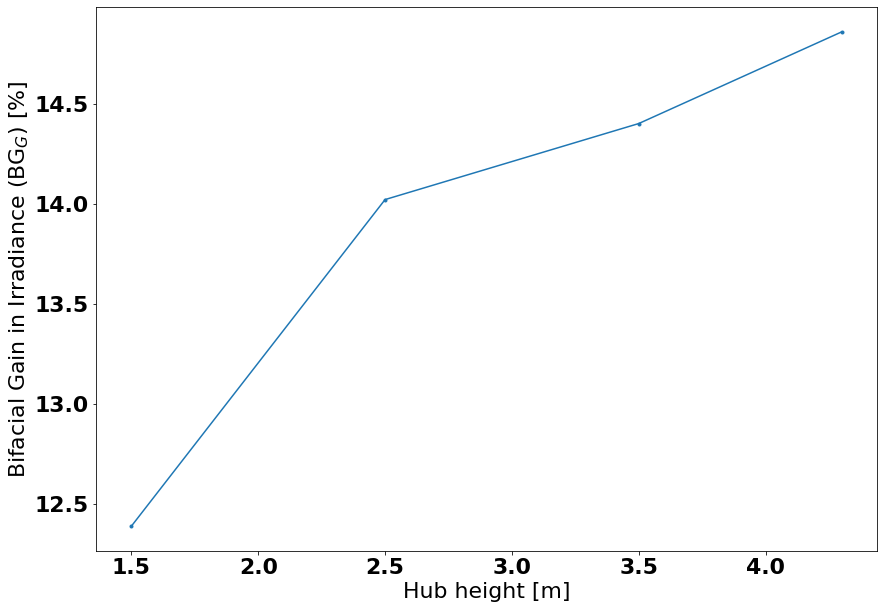

In [52]:
plt.figure(figsize=(14,10))
plt.plot(hub_heights, results_BGG, '.-')
plt.ylabel('Bifacial Gain in Irradiance (BG$_G$) [%]')
plt.xlabel('Hub height [m]')

In [59]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
hub_heights = [4.3, 3.5, 2.5, 1.5]
#'irr_height_150cm_PV_10'
    

In [73]:
maxmax = 0
for hh in range (0, len(hub_heights)):
    for cc in range (0, len(crops)):
        filestarter = "irr_height_"+ str(int(hub_heights[hh]*100))+'cm_'+crops[cc]

        filelist = sorted(os.listdir(os.path.join(testfolder, 'results')))
        prefixed = [filename for filename in filelist if filename.startswith(filestarter)]
        arrayWm2Front = []
        arrayWm2Back = []
        arrayMatFront = []
        arrayMatBack = []
        filenamed = []
        faillist = []

        print('{} files in the directory'.format(filelist.__len__()))
        print('{} groundscan files in the directory'.format(prefixed.__len__()))
        i = 0  # counter to track # files loaded.

        for i in range (0, len(prefixed)-1):
            ind = prefixed[i].split('_')
            #print(" Working on ", filelist[i], locs[ii], Scenario[jj])
            try:
                resultsDF = load.read1Result(os.path.join(testfolder, 'results', prefixed[i]))
                arrayWm2Front.append(list(resultsDF['Wm2Front']))
                arrayWm2Back.append(list(resultsDF['Wm2Back']))
                arrayMatFront.append(list(resultsDF['mattype']))
                arrayMatBack.append(list(resultsDF['rearMat']))
                filenamed.append(prefixed[i])
            except:
                print(" FAILED ", i, prefixed[i])
                faillist.append(prefixed[i])

        resultsdf = pd.DataFrame(list(zip(arrayWm2Front, arrayWm2Back, 
                                          arrayMatFront, arrayMatBack)),
                                 columns = ['br_Wm2Front', 'br_Wm2Back', 
                                            'br_MatFront', 'br_MatBack'])
        resultsdf['filename'] = filenamed
        
        df3 = pd.DataFrame(resultsdf['br_Wm2Front'].to_list())
        reversed_df = df3.T.iloc[::-1]
        
        if df3.max().max() > maxmax:
            maxmax = df3.max().max()


print(" MAX Found," maxmax)

SyntaxError: invalid syntax (<ipython-input-73-8866bafdcd6f>, line 46)

tomato 4.3 793728.5333333333 407349.3
kale 4.3 270607.7333333333 117415.76666666663
tomato 3.5 795911.5 375028.93333333335
kale 3.5 262328.2333333333 105895.63333333336
tomato 2.5 800197.4 353604.66666666674
kale 2.5 250044.26666666672 80852.55
tomato 1.5 798346.4 242326.23333333328
kale 1.5 250107.8 75433.30666666666



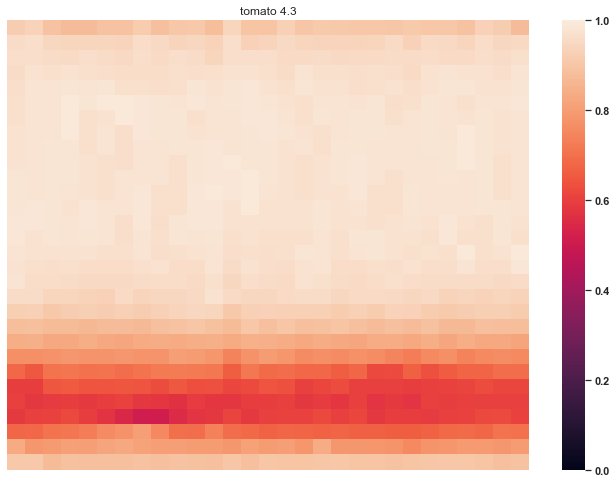

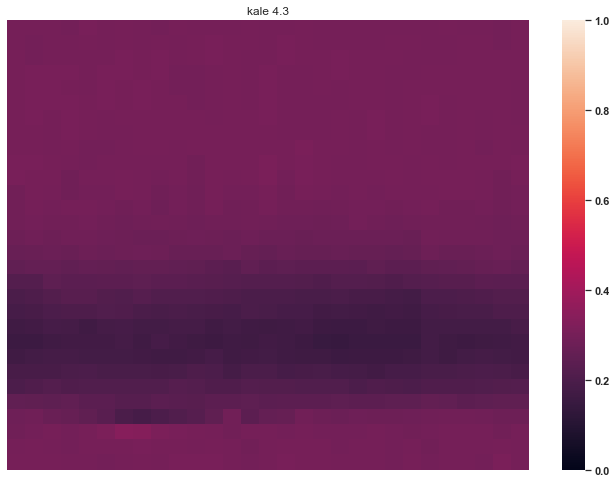

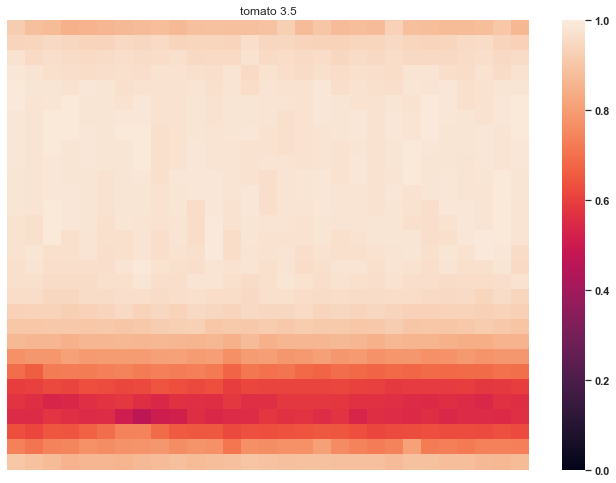

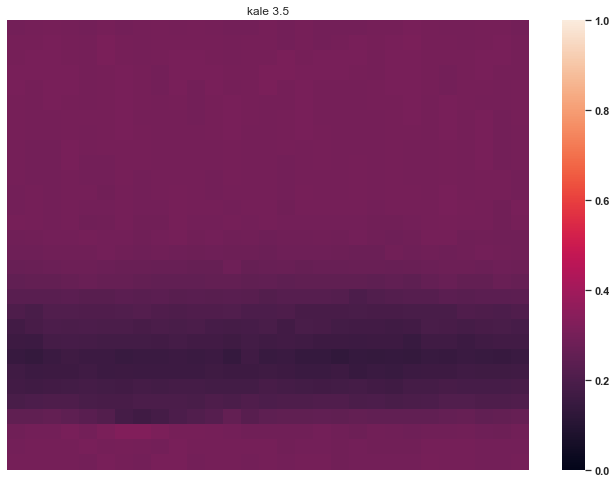

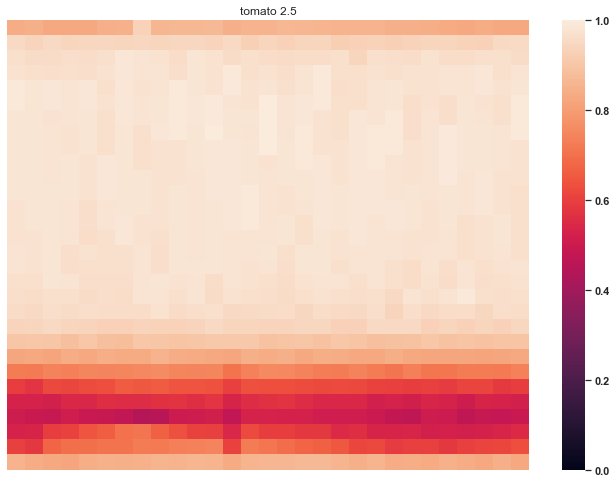

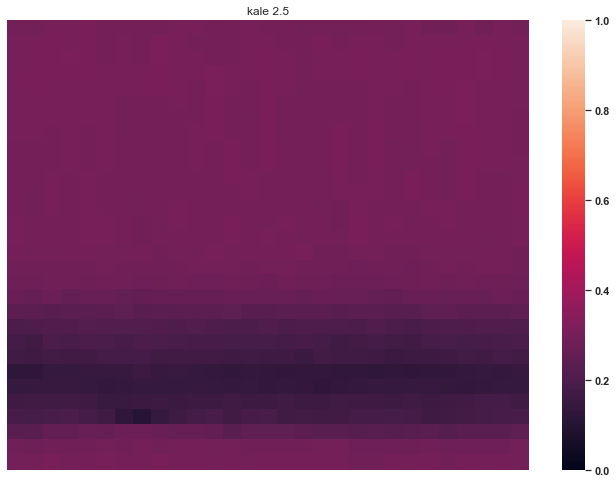

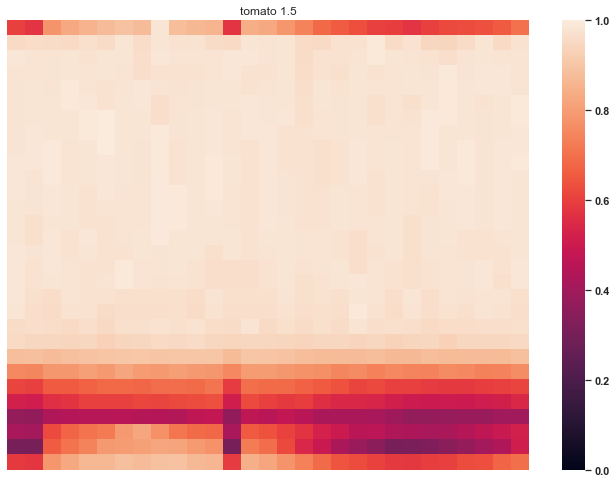

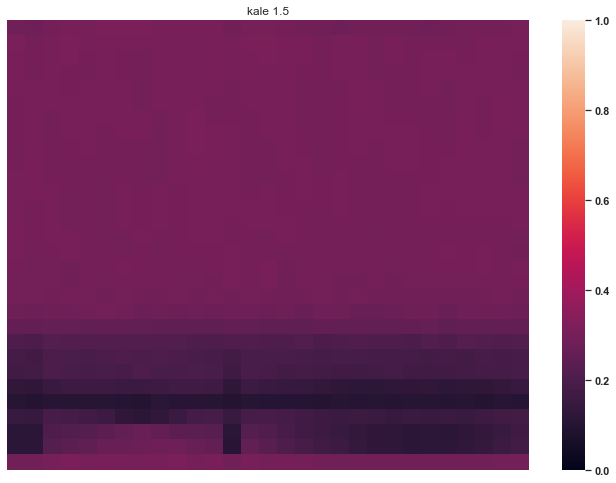

In [77]:
for hh in range (0, len(hub_heights)):
    for cc in range (0, len(crops)):
        filestarter = "irr_height_"+ str(int(hub_heights[hh]*100))+'cm_'+crops[cc]

        filelist = sorted(os.listdir(os.path.join(testfolder, 'results')))
        prefixed = [filename for filename in filelist if filename.startswith(filestarter)]
        arrayWm2Front = []
        arrayWm2Back = []
        arrayMatFront = []
        arrayMatBack = []
        filenamed = []
        faillist = []

        i = 0  # counter to track # files loaded.

        for i in range (0, len(prefixed)-1):
            ind = prefixed[i].split('_')
            #print(" Working on ", filelist[i], locs[ii], Scenario[jj])
            try:
                resultsDF = load.read1Result(os.path.join(testfolder, 'results', prefixed[i]))
                arrayWm2Front.append(list(resultsDF['Wm2Front']))
                arrayWm2Back.append(list(resultsDF['Wm2Back']))
                arrayMatFront.append(list(resultsDF['mattype']))
                arrayMatBack.append(list(resultsDF['rearMat']))
                filenamed.append(prefixed[i])
            except:
                print(" FAILED ", i, prefixed[i])
                faillist.append(prefixed[i])

        resultsdf = pd.DataFrame(list(zip(arrayWm2Front, arrayWm2Back, 
                                          arrayMatFront, arrayMatBack)),
                                 columns = ['br_Wm2Front', 'br_Wm2Back', 
                                            'br_MatFront', 'br_MatBack'])
        resultsdf['filename'] = filenamed
        
        df3 = pd.DataFrame(resultsdf['br_Wm2Front'].to_list())
        reversed_df = df3.T.iloc[::-1]
            
        plt.figure()
        ax = sns.heatmap(reversed_df/maxmax, vmin=0, vmax=1)
        ax.set_yticks([])
        ax.set_xticks([])
        ax.set_ylabel('')  
        ax.set_xlabel('')
        mytitle = crops[cc]+' '+str(hub_heights[hh])
        ax.set_title(mytitle)
        
        print(mytitle, df3.max().max(), df3.min().min())

print("")